# The time and space complexity

The time and space complexity of an algorithm depend on various factors such as the input size, the operations performed, and the data structures used. There is no general formula to calculate the complexity of an algorithm, but it can be analyzed and estimated through various techniques such as counting the number of basic operations, using mathematical models, or by conducting experiments.

In Python, the performance of an algorithm can be measured using the timeit module, which allow us to measure the execution time of small bits of Python code. It can provide a rough estimate of the running time of an algorithm for a given input size.

Example of how we can measure the time complexity of a Python function using the timeit module:

In [10]:
import timeit

def my_function(n):
    result = 0
    for i in range(n):
        result += i
    return result

print("Time:", timeit.timeit(lambda: my_function(1000), number=1000))

Time: 0.04994160000001102


This will print the time taken to run the my_function with an input of size 1000, repeated 1000 times. The result will give us an estimate of the time complexity of the function.

NOTE:The time complexity calculation using the timeit module may not be very accurate, as it can be influenced by various factors such as the CPU load, memory usage, and the operating system. But it's a useful tool to get a rough estimate of the running time of our code.

# Working with some sort algorithms :

In [11]:
import random
import timeit

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr


Now, we create an array of sorting functions (bubble sort, selection sort, insertion sort), and an array of their names. It then generates a random list of 1000 numbers, and times how long each sorting function takes to sort that list 100 times. The results are stored in a pandas dataframe, which is printed at the end

In [12]:
import pandas as pd

sort_functions = [bubble_sort, selection_sort, insertion_sort]
sort_function_names = ["Bubble Sort", "Selection Sort", "Insertion Sort"]

n = 100
random_data = random.sample(range(n), n)

times = []
for i, sort_func in enumerate(sort_functions):
    time = timeit.timeit(lambda: sort_func(random_data.copy()), number=100)
    times.append(time)

df = pd.DataFrame({"Sort Algorithm": sort_function_names, "Time (s)": times})
print(df)


   Sort Algorithm  Time (s)
0     Bubble Sort  0.083673
1  Selection Sort  0.036558
2  Insertion Sort  0.043146


# Complexity O()

To get the complexity of the sorting algorithms in terms of "n", we can measure the time it takes for each algorithm to sort an array of increasing size, and then fit a curve to the data to estimate the growth rate of the running time as "n" increases. The most common growth rate functions for sorting algorithms are O(n^2), O(n log n), and O(n), which correspond to quadratic, logarithmic, and linear time complexity, respectively. To determine the best-fit growth rate for our data, we can use regression analysis or curve-fitting techniques, such as linear regression or polynomial regression.

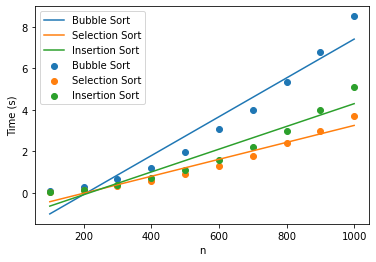

In [13]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

sort_functions = [bubble_sort, selection_sort, insertion_sort]
sort_function_names = ["Bubble Sort", "Selection Sort", "Insertion Sort"]

max_n = 1000
ns = np.arange(100, max_n + 100, 100)

times = []
for sort_func in sort_functions:
    time = []
    for n in ns:
        random_data = random.sample(range(n), n)
        t = timeit.timeit(lambda: sort_func(random_data.copy()), number=100)
        time.append(t)
    times.append(time)

regressions = []
for time in times:
    X = ns.reshape(-1, 1)
    y = np.array(time)
    reg = LinearRegression().fit(X, y)
    regressions.append(reg)

for i, reg in enumerate(regressions):
    plt.plot(ns, reg.predict(ns.reshape(-1, 1)), label=sort_function_names[i])
    plt.scatter(ns, times[i], label=sort_function_names[i])
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

First we create an array ns of increasing values of "n", then use timeit to measure the running time of each sorting algorithm on arrays of size n, and repeats this measurement 100 times for each "n". The resulting running times are then used to fit a linear regression model for each sorting algorithm, and the slope of the regression line can be used as a rough estimate of the time complexity. The code then plots the actual running times and the predicted running times from the regression models for comparison.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd

results = []
for i, (time, func_name) in enumerate(zip(times, sort_function_names)):
    X = ns.reshape(-1, 1)
    y = np.array(time)
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    results.append([func_name, reg.coef_[0], reg.intercept_, mse, r2])

df = pd.DataFrame(results, columns=["Algorithm", "Slope", "Intercept", "MSE", "R2"])
print(df)


        Algorithm     Slope  Intercept       MSE        R2
0     Bubble Sort  0.009347  -1.945310  0.433148  0.943311
1  Selection Sort  0.004080  -0.831768  0.076858  0.946990
2  Insertion Sort  0.005478  -1.183648  0.202637  0.924352


fits a linear regression model to each set of time data, using ns as the feature. It then stores the results, including the algorithm name, slope (coefficient), intercept, mean squared error (MSE), and R-squared value, in a list of lists. Finally, the results are displayed in a pandas DataFrame.

# CREDIT

Lasheb mohamed Amine